In [3]:
# Fixing imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import fetch_openml
from PIL import Image, ImageTk
import time
import random as rnd

In [4]:
# Loading dataset and splitting to training and test set
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)


In [85]:
# Fixing ys
real_y_train = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] for i in range(len(y_train))])
for i in range(len(y_train)):
    real_y_train[i, int(y_train[i, 0])] = 1.0
real_y_test = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] for i in range(len(y_test))])
for i in range(len(y_test)):
    real_y_test[i, int(y_test[i, 0])] = 1.0

In [115]:
class DigitRecognizer():
    def __init__(self):
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)

        self.W = tf.Variable(tf.zeros([784, 10]))
        self.b = tf.Variable(tf.zeros([10]))
        
        logits = tf.matmul(self.x, self.W) + self.b
        self.f = tf.nn.softmax(logits)
        
        self.loss = tf.losses.softmax_cross_entropy(self.y, logits)

In [135]:
model = DigitRecognizer()
mini_op = tf.train.GradientDescentOptimizer(1000).minimize(model.loss)

session = tf.Session()
session.run(tf.global_variables_initializer())

start = time.time()

for i in range(1000):
    session.run(mini_op, {model.x: x_train, model.y: real_y_train})
    if i%100 == 0:
        print("Epoch: %d" % i)


end = time.time()
print("Runtime: %.2f" % (end - start))

W, b, loss = session.run([model.W, model.b, model.loss], {model.x: x_test, model.y: real_y_test})

Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
Runtime: 174.51


In [136]:
print(loss)
print(W)
print(b)

5327818.5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ -429.0288    401.32425  1017.2669   -290.79025   -38.63802  3280.8384
   114.37134  1180.2861  -4522.88     -712.7524 ]


In [137]:
preds = session.run([model.f], {model.x: x_test, model.y: real_y_test})

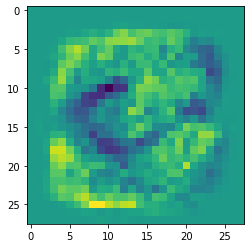

In [155]:
plt.imshow(W[:, 3].reshape(28, 28))
# real_y_train.shape

In [139]:
sum([int(list(preds[0][i]) == list(real_y_test[i])) for i in range(len(preds[0]))])/len(preds[0])*100

91.00571428571429

In [153]:
# Save images
for i in range(10):
    plt.imsave('image_'+str(i)+'.png', W[:, i].reshape(28, 28))

In [5]:
x_train.shape

(52500, 784)

In [ ]:
#Shows the optimized W in as images in a subplots
fig, ax = plt.subplots(2,5)

ax[0,0].set_title("0") # Print the classification of the first observation in the training set
ax[0,0].imshow(W[:,0].reshape(28,28)) # Show x of first observation in the training set
ax[0,1].set_title("1")
ax[0,1].imshow(W[:,1].reshape(28,28))
ax[0,2].set_title("2")
ax[0,2].imshow(W[:,2].reshape(28,28))
ax[0,3].set_title("3")
ax[0,3].imshow(W[:,3].reshape(28,28))
ax[0,4].set_title("4")
ax[0,4].imshow(W[:,4].reshape(28,28))
ax[1,0].set_title("5")
ax[1,0].imshow(W[:,5].reshape(28,28))
ax[1,1].set_title("6")
ax[1,1].imshow(W[:,6].reshape(28,28))
ax[1,2].set_title("7")
ax[1,2].imshow(W[:,7].reshape(28,28))
ax[1,3].set_title("8")
ax[1,3].imshow(W[:,8].reshape(28,28))
ax[1,4].set_title("9")
ax[1,4].imshow(W[:,9].reshape(28,28))